<font face='Liberation serif' size=8>
Исследование вакансий Data Scientist и Data Analyst.

<font face='Liberation serif' size=6>
Цель проекта:

Провести сравнительный анализ вакансий Data Scientist и Data Analyst, выявить основные требования к кандидатам, определить ключевые навыки и знания, необходимые для успешной работы в этих ролях, а также оценить уровень заработной платы и перспективы карьерного роста.

<font face='Liberation serif' size=6>
План действий:

**Подготовка данных.**

**Анализ данных:**
- доля вакансий для выпускников средней школы, старшей школы и колледжей среди всех вакансий аналитиков данных и специалистов по обработке данных;
- наиболее востребованные навыки (жёсткие и мягкие) для кандидатов на эти позиции в зависимости от уровня образования;
- типичные вакансии для выпускников разных уровней образования, включая лучших работодателей, заработную плату, тип занятости и график работы.

**Расчёт ежемесячной динамики количества вакансий** для аналитиков данных и специалистов по обработке данных для разных уровней образования.

**Выводы и рекомендации.**

**Подготовка презентации.**

<font face='Liberation serif' size=6>
Описание данных:


У нас есть два набора данных об активных вакансиях, опубликованных на сайте HH.ru за последний месяц по состоянию на 30 апреля 2024 года. Эти данные были получены через API HH.ru.

- **da.csv** - вакансии аналитиков данных
- **ds.csv** - вакансии датасаентистов

Столбцы в двух таблицах **идентичны:**

- id - уникальный номер вакансии
- name - название вакансии
- published_at - дата публикации вакансии(Для каждой вакансии мы сохраням только первую дату публикации)
- alternate_url - ссылка на вакансию
- type - тип вакансии
- employer - работодатель
- department - подразделение работодателя
- area - регион вакансии
- experience - требуемый опыт работы
- key_skills - требуемые скиллы
- schedule - график работы
- employment - тип занятости
- description - подробное описание вакансии
- salary_from - зарплата от
- salary_to - зарплата до
- currency_salary - валюта зарплаты
- description_lemmatized - описание вакансии (лимитирована)
- salary_bin - Категория зарплаты
- key_skills_from_key_skills_field - ключевые скиллы
- hard_skills_from_description - хард скиллы
- soft_skills_from_description - софт скиллы

<font face='Liberation serif' size=6>
Загрузка данных и Подготовка к анализу

In [1]:
# Импортируем необходимые библиотеки 
import warnings
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import requests
from tqdm import tqdm
from typing import List


In [2]:
#Изучаем данные
da = pd.read_excel('vacancies_da (2).xlsx', parse_dates=['published_at'])
ds = pd.read_excel('vacancies_ds.xlsx', parse_dates=['published_at'])


In [3]:
#Выводим первые 5 строк
da.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
114,95061919,Аналитик данных / Data analyst,2024-04-15 14:16:09,https://hh.ru/vacancy/95061919,Открытая,FISH FINDER,NaN,Москва,Junior+ (1-3 years),"['Анализ ассортиментной линейки', 'Аналитическ...",Полный день,Полная занятость,"мы - прогрессивно развивающаяся компания, боле...",прогрессивный развивающийся компания 3 х год у...,80000.0,120000.0,От 100 тысяч до 200 тысяч,"Аналитическое мышление, Аналитика, Анализ данн...",NaN,NaN
265,97432884,Product Data analyst (управление товарными пот...,2024-04-28 14:08:26,https://hh.ru/vacancy/97432884,Открытая,Леруа Мерлен,ИТ,Москва,Senior (6+ years),"['Проактивность', 'SQL', 'Python', 'Аналитичес...",Полный день,Полная занятость,тебе предстоит погрузиться в особенности проце...,предстоять погружаться особенность процесс рас...,NaN,NaN,ЗП не указана,"SQL, Python",NaN,"Проактивность, Аналитическое мышление"
121,95103976,Data Analyst в Транзакционный банкинг B2C,2024-03-20 09:39:00,https://hh.ru/vacancy/95103976,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),['Pandas'],Полный день,Полная занятость,в команду &quot;транзакционный банкинг b2c&quo...,команда quot транзакционный банкинг b2c quot и...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
175,95911208,Data Scientist / Data Analyst / Data engineer,2024-04-01 17:10:40,https://hh.ru/vacancy/95911208,Открытая,СтандартПроект,NaN,Москва,Junior+ (1-3 years),"['Elasticsearch', 'Pandas', 'Документация', 'L...",Полный день,Полная занятость,привет! мы команда единомышленников и професси...,привет команда единомышленник профессионал ста...,NaN,NaN,ЗП не указана,"Python, PostgreSQL, Grafana, Elasticsearch, Cl...",Pandas,"Коммуникация, Документация, Аналитическое мышл..."
88,94761324,Senior Data Analyst,2024-04-11 08:14:11,https://hh.ru/vacancy/94761324,Открытая,КБ Уральский банк реконструкции и развития (УБ...,NaN,Екатеринбург,Middle (3-6 years),"['Data Analysis', 'Spark', 'Python', 'Big Data...",Полный день,Полная занятость,наш центр аналитики больших данных — это лабор...,наш центр аналитик большой данные лаборатория ...,NaN,NaN,ЗП не указана,"SQL, Python, Big Data, Spark, Data Analysis",NaN,NaN


In [4]:
#Выводим первые 5 строк
ds.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
285,95112097,Data Scientist,2024-03-29 12:32:35,https://hh.ru/vacancy/95112097,Открытая,БиАйЭй-Технолоджиз,NaN,Москва,Middle (3-6 years),"['Pandas', 'Arima', 'Python', 'Catboost', 'Xgb...",Полный день,Полная занятость,"о проекте: активно расширяем команду, которая ...",проект активно расширять команда работать прое...,NaN,NaN,ЗП не указана,"Python, PyTorch, Tensorflow, Pandas, Numpy, Xg...",Pandas,NaN
459,96446630,Data Scientist (NLP/ LLM),2024-04-08 16:56:27,https://hh.ru/vacancy/96446630,Открытая,ФГБОУ ВО МГТУ им. Н.Э. Баумана,NaN,Москва,Junior+ (1-3 years),"['Pandas', 'Документация']",Полный день,Полная занятость,в центре &quot;технологии искусственного интел...,центр quot технология искусственный интеллект ...,NaN,NaN,ЗП не указана,NaN,Pandas,Документация
643,97967656,Middle Data Scientist,2024-04-26 09:16:19,https://hh.ru/vacancy/97967656,Открытая,GlowByte,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,glowbyte - лидер в сфере разработки business i...,glowbyte лидер сфера разработка business intel...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
546,97238756,Data Scientist (Центр модельных рисков сервисн...,2024-04-17 15:56:00,https://hh.ru/vacancy/97238756,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),['Юнит-экономика'],Полный день,Полная занятость,наша команда занимается оценкой и управлением ...,наш команда заниматься оценка управление модел...,NaN,NaN,ЗП не указана,NaN,Юнит-экономика,NaN
292,95161303,Data Scientist (Senior) в Южно-Сахалинск,2024-03-21 05:27:04,https://hh.ru/vacancy/95161303,Открытая,Сахалин - Остров Возможностей,NaN,Москва,Middle (3-6 years),"['Коммуникация', 'SQL', 'Python']",Полный день,Полная занятость,рабочее место располагается в г. южно-сахалинс...,рабочий место располагаться г южный сахалинск ...,NaN,500000.0,Больше 300 тысяч,"Python, SQL",NaN,Коммуникация


Обратим внимание на **key_skills** там есть пустые списки

Создадим переменные и объеденим датасеты 

In [5]:
# Создаем переменные
da['name_type'] = 'da'
ds['name_type'] = 'ds'

# объеденяем таблицы
vacancies = pd.concat((da, ds))
start_data_size = vacancies.shape[0]

Теперь можно изучить информарцию о датасете 

In [6]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 0 to 661
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                972 non-null    int64         
 1   name                              972 non-null    object        
 2   published_at                      972 non-null    datetime64[ns]
 3   alternate_url                     972 non-null    object        
 4   type                              972 non-null    object        
 5   employer                          972 non-null    object        
 6   department                        362 non-null    object        
 7   area                              972 non-null    object        
 8   experience                        972 non-null    object        
 9   key_skills                        972 non-null    object        
 10  schedule                          972 non-null    objec

Зачастую работодатели не указывают размер заработной платы в вакансиях.

<font face='Liberation serif' size=6>
Предобработка данных

In [7]:
# Проверим данные на наличие дубликатов 
vacancies.duplicated().sum()

0

В нашем датасете есть вакансии, которые относятся одновременно к аналитикам данных и Data Scientist. Поскольку мы хотим сравнить эти две группы, давайте определим, сколько таких смежных вакансий в наших данных, и удалим их.

In [8]:
#Отберем нужные нам данные
dubl = (vacancies.name.str.lower().str.contains(r'data scien')
    & (vacancies.name.str.lower().str.contains(r'analyst')
    | vacancies.name.str.lower().str.contains(r'аналитик')) 
    & (~vacancies.name.str.lower().str.contains(r'видеоаналитика')))
vacancies[dubl].sort_values(by='id')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type
17,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
61,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
18,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
62,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
67,92068025,"Аналитик данных (data scientist, data engineer)",2024-03-12 12:42:01,https://hh.ru/vacancy/92068025,Открытая,Федеральное государственное автономное учрежде...,NaN,Москва,Middle (3-6 years),"['Документация', 'Создание моделей', 'Оформлен...",...,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,настоящий время фгау нии цэпп расширять команд...,100000.0,NaN,ЗП не указана,"Python, Системы автоматического контроля, Созд...",NaN,Документация,ds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,97615359,Junior Data Scientist / Младший аналитик данных,2024-04-22 12:25:28,https://hh.ru/vacancy/97615359,Открытая,АДВ,NaN,Москва,Junior (no experince),"['Прогнозирование', 'Pandas', 'Python', 'Матем...",...,Полная занятость,"адв tech – дивизион, где создаются уникальные ...",адва tech дивизион создаваться уникальный техн...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, Обучение и ...",Pandas,NaN,ds
585,97633428,Аналитик данных/Специалист по Power BI (data s...,2024-04-28 15:04:07,https://hh.ru/vacancy/97633428,Открытая,Multi Family Office,NaN,Москва,Junior+ (1-3 years),"['Коммуникация', 'Python', 'data science', 'Po...",...,Полная занятость,мы команда компании family financial system - ...,команда компания family financial system проек...,NaN,NaN,ЗП не указана,"data science, Power BI, Python",NaN,Коммуникация,ds
619,97752822,Аналитик данных / Data Scientist,2024-04-23 18:59:15,https://hh.ru/vacancy/97752822,Открытая,Эттон,NaN,Казань,Middle (3-6 years),"['Machine Learning', 'Data Analysis', 'Прогноз...",...,Полная занятость,если ты … имеешь профильное образование по с...,иметь профильный образование специальность мат...,NaN,NaN,ЗП не указана,"data Scientist, Big Data, Machine Learning, Пр...",NaN,Документация,ds
651,98042432,Аналитик данных / Data Scientist (Middle),2024-04-27 08:07:34,https://hh.ru/vacancy/98042432,Открытая,Дром,NaN,Владивосток,Middle (3-6 years),"['Google Analytics', 'Документация', 'Python',...",...,Полная занятость,drom — это автомобильный интернет-портал федер...,drom автомобильный интернет портал федеральный...,150000.0,200000.0,От 200 тысяч до 300 тысяч,"Python, Google Analytics, SQL, Математическая ...",NaN,Документация,ds


In [9]:
print(f'Количество смежных вакансий - {vacancies[dubl].shape[0]}')

Количество смежных вакансий - 72


В нашем распоряжении имеется 72 наблюдений, которые относятся к обеим группам. Давайте исключим их из рассмотрения.

In [10]:
#Удаляем ненужные нам вакансии
vacancies = vacancies[~dubl].sort_values(by='id')

В нашей выборке оказались системные аналитики, давайте их удалим.


In [11]:
##Отберем нужные нам данные
system =(((vacancies.name.str.lower().str.contains(r'систем')) | 
      (vacancies.name.str.lower().str.contains(r'system'))) &
      ~(vacancies.name.str.lower().str.contains(r'data scientist') | 
      vacancies.name.str.lower().str.contains(r'аналитик данных') |
      vacancies.name.str.lower().str.contains(r'дата аналитик')))

In [12]:
print(f'Количество вакансий системных аналитиков - {vacancies[system].shape[0]}')

Количество вакансий системных аналитиков - 4


In [13]:
#Удаляем ненужные нам вакансии
vacancies = vacancies[~system]

In [14]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 309
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                896 non-null    int64         
 1   name                              896 non-null    object        
 2   published_at                      896 non-null    datetime64[ns]
 3   alternate_url                     896 non-null    object        
 4   type                              896 non-null    object        
 5   employer                          896 non-null    object        
 6   department                        350 non-null    object        
 7   area                              896 non-null    object        
 8   experience                        896 non-null    object        
 9   key_skills                        896 non-null    object        
 10  schedule                          896 non-null    objec

Были удалены ненужные вакансии. Можно работать дальше 

In [15]:
#Добавим дату и преобразуем ее 
vacancies.loc[:, 'published_date'] = vacancies.published_at.dt.date

In [16]:
#Проверим дубликаты по id
n_dupl = vacancies.duplicated(
    subset='id'
).sum()
print(f'Найдено дубликатов - {n_dupl}')

Найдено дубликатов - 0


In [17]:
#Проверим неявные дубликаты
vacancies[
    vacancies.duplicated(
        subset=['name', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date
86,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-03-13
95,94827220,Data Analyst,2024-03-15 13:54:00,https://hh.ru/vacancy/94827220,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),['Креативность'],...,мы команда аналитического управления центра ко...,команда аналитический управление центр комплае...,NaN,NaN,ЗП не указана,NaN,NaN,Креативность,da,2024-03-15
62,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da,2024-03-27
269,97587281,Data Analyst,2024-04-22 09:00:00,https://hh.ru/vacancy/97587281,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),['Креативность'],...,мы команда аналитического управления центра ко...,команда аналитический управление центр комплае...,NaN,NaN,ЗП не указана,NaN,NaN,Креативность,da,2024-04-22
276,97741410,Data Analyst,2024-04-23 16:32:21,https://hh.ru/vacancy/97741410,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da,2024-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,96727424,Специалист по Data Science,2024-04-11 15:21:38,https://hh.ru/vacancy/96727424,Открытая,БАНК УРАЛСИБ,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,чем предстоит заниматься принимать участие в...,предстоять заниматься принимать участие весь э...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-04-11
145,94235433,Эконометрист (junior data scientist),2024-03-05 01:51:46,https://hh.ru/vacancy/94235433,Открытая,Аналитический центр при Правительстве Российск...,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Эконометрика', 'Python',...",...,задачи: разработка алгоритмов предварительног...,задача разработка алгоритм предварительный ана...,NaN,NaN,ЗП не указана,"Python, Статистический анализ, SQL, Математиче...",NaN,NaN,ds,2024-03-05
435,96175298,Эконометрист (junior data scientist),2024-04-04 12:33:52,https://hh.ru/vacancy/96175298,Открытая,Аналитический центр при Правительстве Российск...,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Эконометрика', 'Python',...",...,задачи: разработка алгоритмов предварительног...,задача разработка алгоритм предварительный ана...,NaN,NaN,ЗП не указана,"Python, Статистический анализ, SQL, Математиче...",NaN,NaN,ds,2024-04-04
359,95613788,Эконометрист / Data scientist,2024-03-27 13:03:38,https://hh.ru/vacancy/95613788,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds,2024-03-27


In [18]:
#Удалим неявные дубликаты 
vacancies.drop_duplicates(
    subset=['name', 'employer', 'department', 'area', 'description'],
    keep=False, inplace=True
)


In [19]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 309
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                756 non-null    int64         
 1   name                              756 non-null    object        
 2   published_at                      756 non-null    datetime64[ns]
 3   alternate_url                     756 non-null    object        
 4   type                              756 non-null    object        
 5   employer                          756 non-null    object        
 6   department                        286 non-null    object        
 7   area                              756 non-null    object        
 8   experience                        756 non-null    object        
 9   key_skills                        756 non-null    object        
 10  schedule                          756 non-null    objec

Предобработка данных завершена. Идем дальше 

<font face='Liberation serif' size=6>
Анализ данных

Выведем 20 наиболее часто встречающихся названий вакансий из списка

In [20]:
vacancies.name.value_counts()[:20]

name
Data Scientist                                             79
Data Analyst                                               53
Senior Data Scientist                                      18
Data scientist                                             12
Middle Data Scientist                                      11
Data analyst                                                9
Senior Data Analyst                                         8
Аналитик данных / Data Analyst                              8
Junior Data Scientist                                       7
Data Scientist (middle)                                     6
Data Scientist (Middle) с переездом в Южно-Сахалинск        6
Senior Data Scientist (NLP)                                 5
Senior Data Scientist в команду антифрода                   5
Data Scientist в команду персонализации                     4
Senior Data scientist                                       4
Data analyst / Аналитик данных                              4
Sen

Определим самую раннюю и самую позднюю даты публикации вакансий.

In [21]:
print(f'Начало - {vacancies.published_date.min().strftime("%Y-%m-%d %X")}')
print(f'Конец - {vacancies.published_date.max().strftime("%Y-%m-%d %X")}')

Начало - 2024-02-29 00:00:00
Конец - 2024-04-30 00:00:00


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

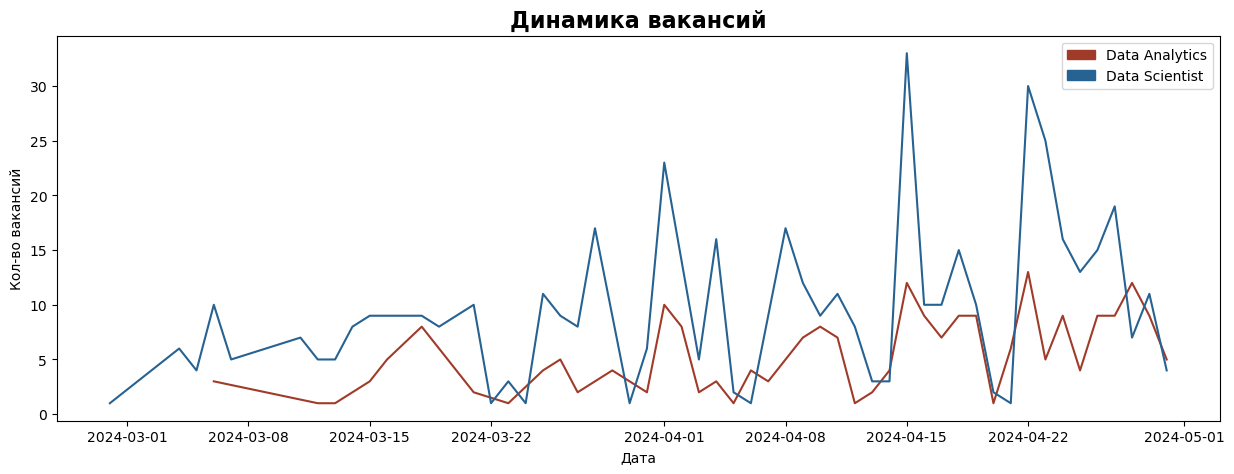

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))

# получаем данные для графиков
data = vacancies.groupby(['name_type', 'published_date'], as_index=False).id.count()

# отрисовываем графики
sns.lineplot(data[data.name_type == 'da'], x='published_date', color = '#A03B2A', y='id', ax=ax)
sns.lineplot(data[data.name_type == 'ds'], x='published_date', color = '#266292', y='id', ax=ax)

# Добавляем названия
plt.title('Динамика вакансий', fontsize=16, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Кол-во вакансий')

# добавляем легенду
analyst_patch = mpatches.Patch(color = '#A03B2A', label='Data Analytics')
datascience_patch = mpatches.Patch(color = '#266292',label='Data Scientist')
plt.legend(handles=[analyst_patch, datascience_patch])

# выводим график
plt.show()

Пиковый интерес был зафиксирован 15 и 22 апреля 2024 года. К концу месяца активность в поиске кандидатов и поиске работы снижается. Это вполне ожидаемо, поскольку в целом к концу месяца интерес к поиску работы и поиску сотрудников обычно уменьшается по сравнению с серединой месяца.

Немного регионоведения :) Взглянем на ТОП-10

In [23]:
vacancies[vacancies.name_type == 'da'].area.value_counts()[:10]

area
Москва             190
Санкт-Петербург     32
Екатеринбург         5
Новосибирск          3
Самара               2
Краснодар            2
Ростов-на-Дону       2
Владивосток          2
Казань               2
Ижевск               1
Name: count, dtype: int64

Мы рассматриваем вакансии только из России, особенно из её центральной части. Теперь взглянем на компании 

employer
СБЕР                         44
WILDBERRIES                  12
МТС                           7
Okko                          6
МАГНИТ, Розничная сеть        6
«UZUM TECHNOLOGIES».          5
StudyWorld                    4
Maxim technology              4
ЦРТ | Группа компаний         3
ПСБ (ПАО «Промсвязьбанк»)     3
Name: count, dtype: int64

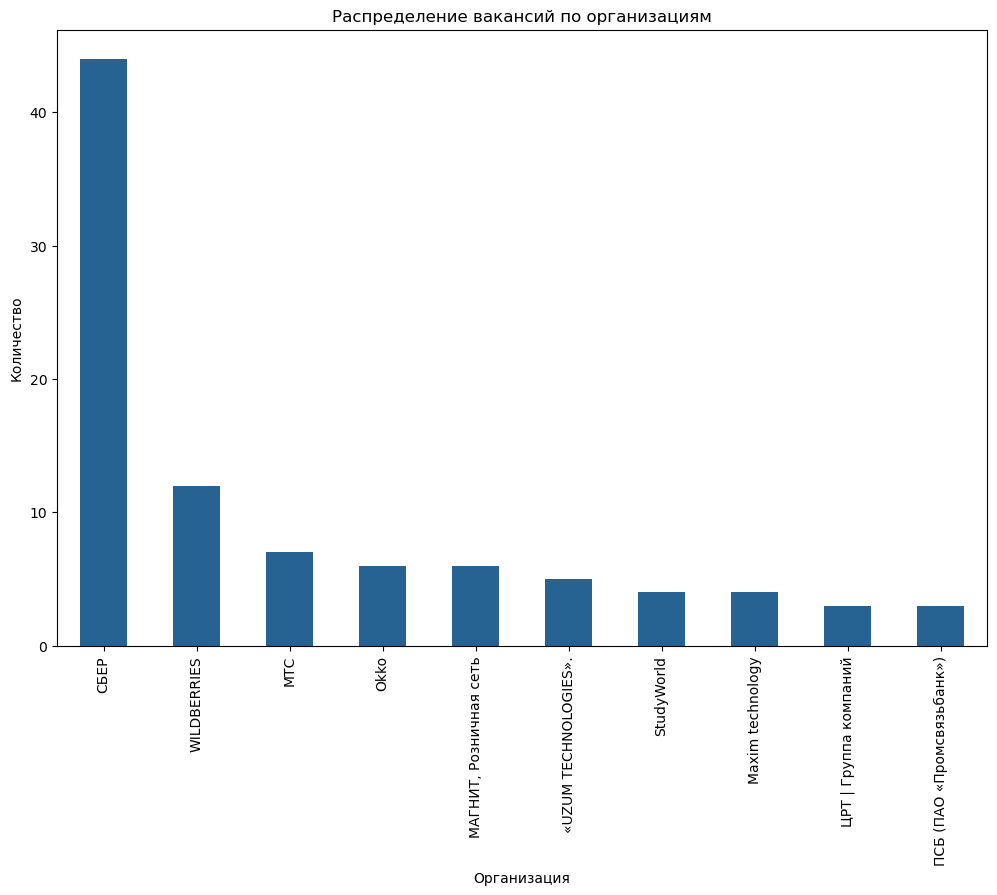

In [24]:
company = vacancies[vacancies.name_type == 'da'].employer.value_counts()[:10]

# Сделаем график
company.plot (kind='bar', figsize = (12,8), color = '#266292')
plt.title('Распределение вакансий по организациям')
plt.xlabel('Организация')
plt.ylabel('Количество');

company

Самый крупный банк и самый крупный Маркетплейс находятся на вершине нашего ТОПа

Изучим требования к опыту работы кандидатов

experience
Junior+ (1-3 years)      352
Middle (3-6 years)       351
Junior (no experince)     30
Senior (6+ years)         23
Name: count, dtype: int64

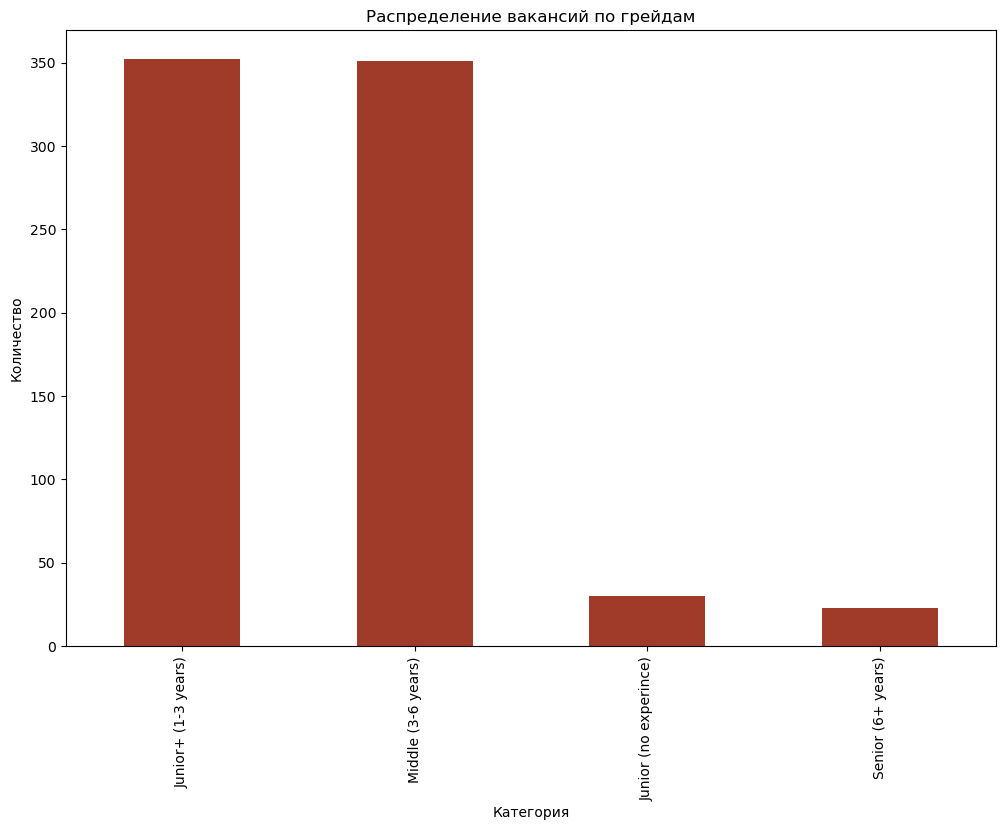

In [25]:
#Выведем ТОП-10
vacancies_top_1 = vacancies.experience.value_counts()

# Сделаем график
vacancies_top_1.plot (kind='bar', figsize = (12,8), color = '#A03B2A')
plt.title('Распределение вакансий по грейдам')
plt.xlabel('Категория')
plt.ylabel('Количество');

vacancies_top_1

Из предоставленных данных следует, что:
- 352 вакансии для специалистов с опытом работы от 1 до 3 лет (Junior+),
- 351 вакансию для специалистов с опытом работы от 3 до 6 лет (Middle),
- 30 вакансий для начинающих специалистов без опыта работы (Junior)
- 23 вакансии для специалистов с опытом работы более 6 лет (Senior).
Это говорит о том, что компании активно набирают сотрудников на разные уровни должностей и готовы инвестировать в развитие молодых специалистов. Но специалисты без опыта все же не так востребованы.

Изучим график работы 

schedule
Полный день         566
Удаленная работа    152
Гибкий график        33
Сменный график        5
Name: count, dtype: int64

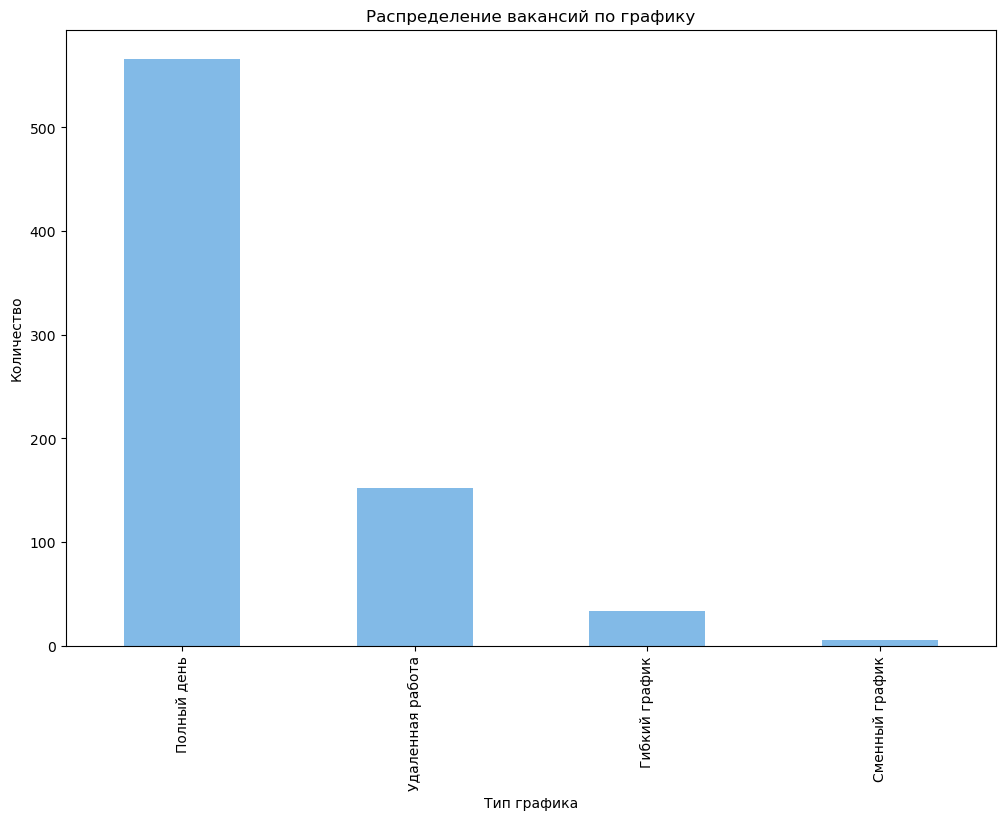

In [26]:
#Выведем ТОП-10
vacancies_top_2 = vacancies.schedule.value_counts()

# Сделаем график
vacancies_top_2.plot (kind='bar', figsize = (12,8), color = '#82bae7')
plt.title('Распределение вакансий по графику')
plt.xlabel('Тип графика')
plt.ylabel('Количество');

vacancies_top_2

Из представленных данных можно сделать вывод, что большинство вакансий предполагают работу в режиме полного рабочего дня — 566 предложений. Также востребована удаленная работа — 152 предложения. Меньше всего вакансий со сменным графиком — всего 5 предложений.

Взглянем на тип занятости 

employment
Полная занятость       740
Стажировка              12
Проектная работа         2
Частичная занятость      2
Name: count, dtype: int64

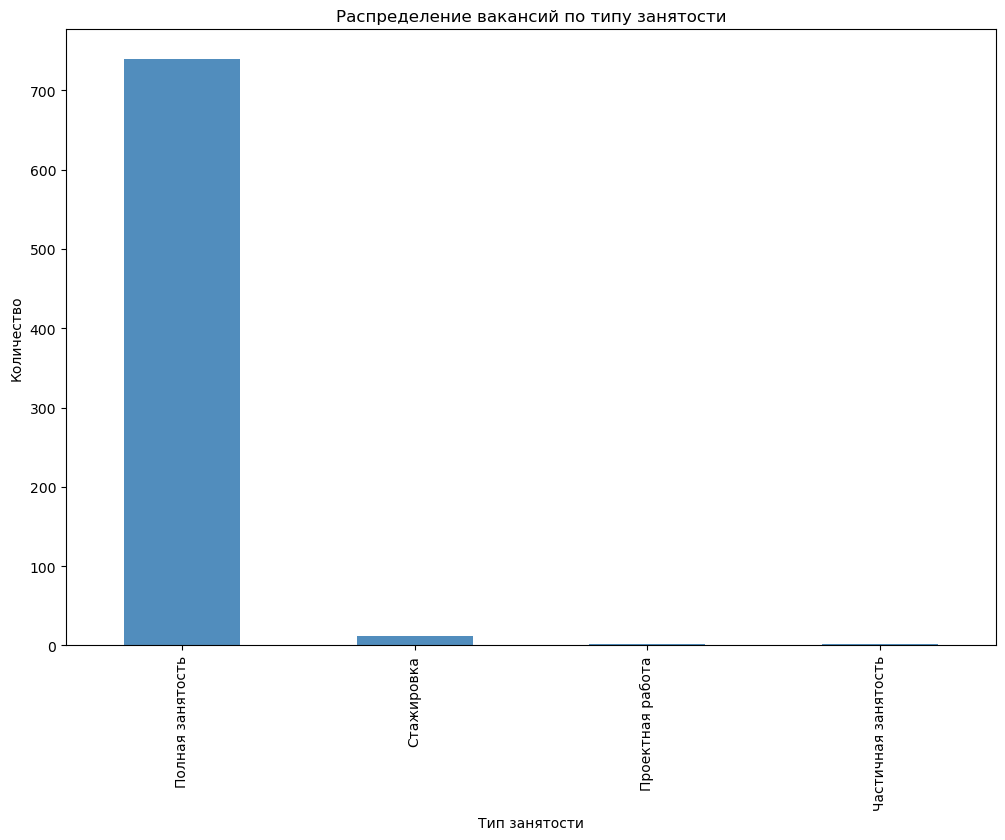

In [27]:
employment = vacancies.employment.value_counts()

# Сделаем график
employment.plot (kind='bar', figsize = (12,8), color = '#518dbd')
plt.title('Распределение вакансий по типу занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Количество');

employment

Данные показывают, что большинство вакансий предлагают полную занятость — 740 предложений. Стажировок предлагается всего 12, а вакансий с частичной занятостью и проектной работой — по 2. Интересно было бы взглянуть на данные во времена Ковида. :)

In [28]:
# Вычесли среднее значение зп на основе порогов
def calc_salary_num(row: pd.Series) -> float:
    
    # Проверяем, указаны ли оба порога зарплаты, и если да, возвращаем их среднее
    if not row.isna()['salary_to'] and not row.isna()['salary_from']:
        return (row['salary_to'] + row['salary_from']) / 2
    
    # Возвращаем верхний порог зарплаты, если он указан
    if not row.isna()['salary_to']:
        return row['salary_to']
    
    # Возвращаем нижний порог зарплаты, если он указан
    if not row.isna()['salary_from']:
        return row['salary_from']

In [29]:
vacancies['salary_num'] = vacancies.apply(calc_salary_num, axis=1)

In [30]:
vacancies.salary_num.value_counts()

salary_num
200000.0    8
150000.0    8
350000.0    8
250000.0    7
100000.0    4
300000.0    4
175000.0    3
180000.0    3
130000.0    3
30000.0     2
375000.0    2
275000.0    2
233750.0    2
90000.0     2
120000.0    2
140000.0    2
60000.0     2
187000.0    2
160000.0    2
165000.0    2
190000.0    2
420750.0    2
125000.0    1
80000.0     1
390000.0    1
374000.0    1
215000.0    1
230000.0    1
76000.0     1
155000.0    1
25000.0     1
500000.0    1
400000.0    1
75000.0     1
280000.0    1
170000.0    1
285000.0    1
450000.0    1
550000.0    1
Name: count, dtype: int64

Распределение зарплат из вакансий


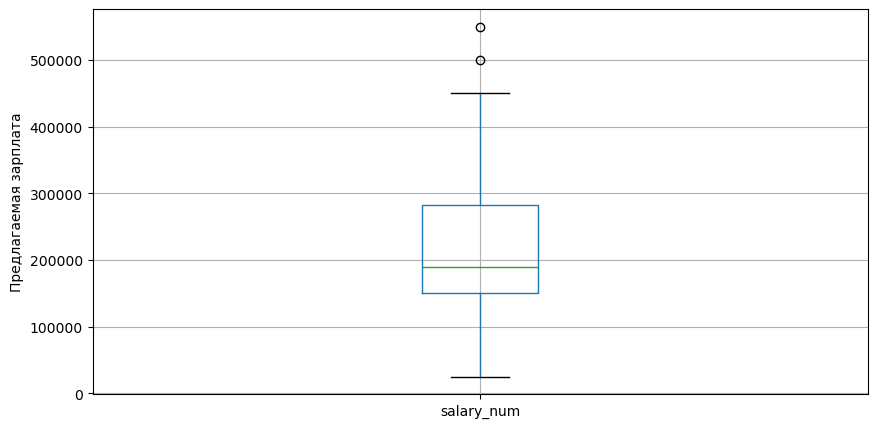

In [31]:
#Рассмотрим общие данные
print('Распределение зарплат из вакансий')
vacancies.boxplot('salary_num', figsize=(10,5))
plt.ylabel('Предлагаемая зарплата')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_num', ylabel='Count'>

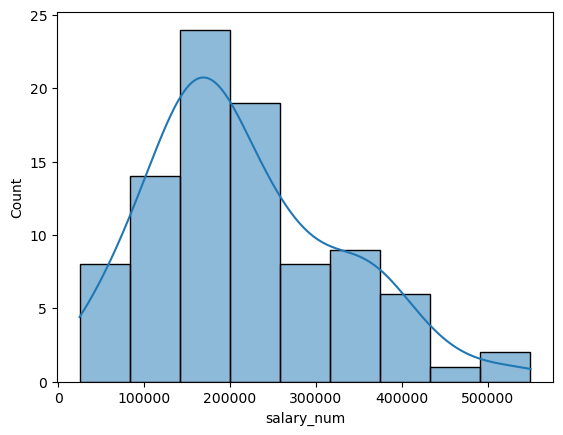

In [32]:

# Сделаем график

sns.histplot(data=vacancies['salary_num'], kde=True)



Распределение выглядит очень наглядно и напоминает распределение заработной платы. Можно заметить, что медианное значение зарплаты чуть превышает 200 тысяч рублей.

<font face='Liberation serif' size=5>
Выводы

- В процессе подготовки данных к анализу был выполнен ряд операций, направленных на очистку и систематизацию информации.
- Также было отмечено, что многие работодатели не указали информацию о заработной плате, что затруднило анализ зарплат на рынке.
- В наборе данных были обнаружены вакансии с названиями «Аналитик данных/Data Scientist», которые были исключены из анализа, поскольку их нельзя было однозначно отнести к какой-либо из групп, удалив 72 таких записей.
- Кроме того, из выборки были удалены системные аналитики.
- Анализ показал, что данные охватывают период с 29 февраля 2024 года до 30 апреля 2024 года.
- Интерес к поиску работы и поиску сотрудников обычно уменьшается к концу месяца по сравнению с его серединой.
- В наборе данных представлены вакансии в основном из центральной части России.
- Создана переменная salary_num, отражающая зарплату в числовом формате или nan, если зарплата не указана.
- Большинство вакансий предполагают работу в режиме полного рабочего дня — 566 предложений. Также востребована удалённая работа — 152 предложения. Меньше всего вакансий со сменным графиком — всего 5 предложений.
- Большинство вакансий предлагают полную занятость — 740 предложений. Стажировок предлагается всего 12, а вакансий с частичной занятостью и проектной работой — по 2.
- Медианное значение заработной платы составляет чуть более 200 тысяч рублей.
- Компании активно набирают сотрудников на разные уровни должностей и готовы инвестировать в развитие молодых специалистов. Однако специалисты без опыта всё ещё не так востребованы.

<font face='Liberation serif' size=6>
Исследовательский анализ данных

Начнем с определения доли Data Analytics и Data scientist

Общее количество вакансий - 756


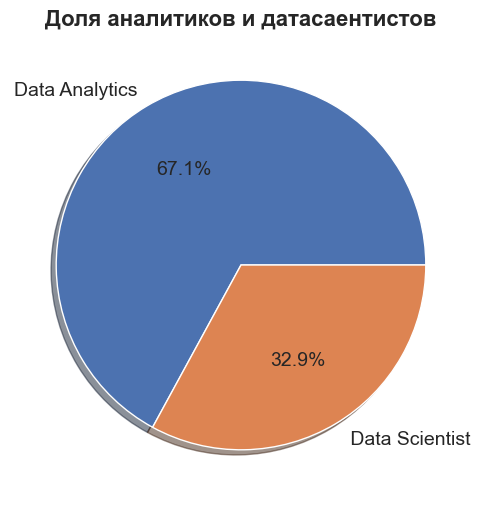

In [33]:

df = vacancies.name_type.value_counts().reset_index()
print(f'Общее количество вакансий - {vacancies.shape[0]}')

# Устанавливаем тему для графиков
sns.set(style="darkgrid")

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))  # Устанавливаем размер фигуры
plt.pie(
    df['count'], 
    labels=['Data Analytics', ' Data Scientist'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    shadow=True,
)

# Устанавливаем заголовок
plt.title(
    'Доля аналитиков и датасаентистов', 
    fontsize=16,
    fontweight="bold"
)

# Отображаем диаграмму
plt.show()

Количество вакансий аналитиков почти в 2,5 раза превышает число вакансий датасаентистов. Посмотрим распределение по требуемому опыту работы 

Общее количество вакансий Data Analytics - 507
Общее количество вакансий Data Scientist - 249


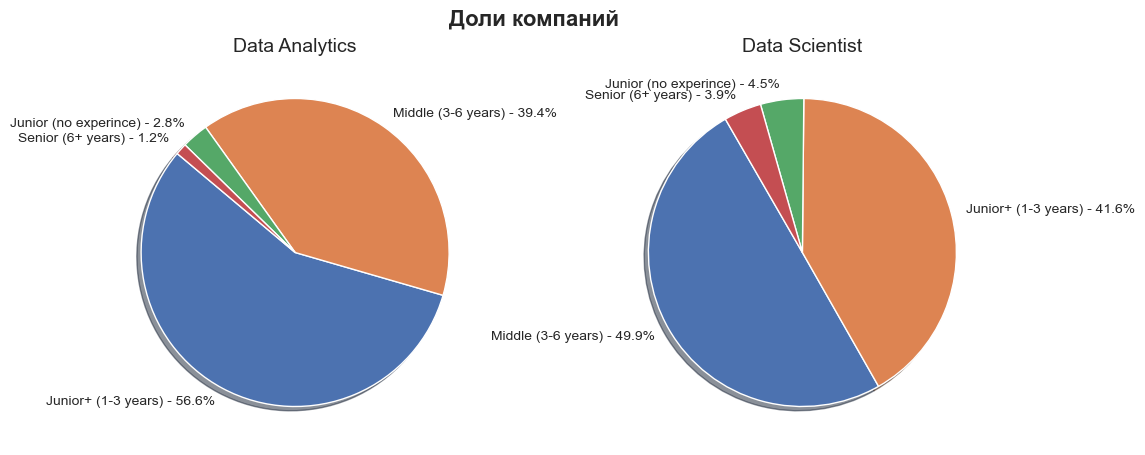

In [34]:
# получаем данные
df_da = vacancies[vacancies.name_type == 'da'].experience.value_counts()[:5]
         
df_ds = vacancies[vacancies.name_type == 'ds'].experience.value_counts()[:5]

print(f'Общее количество вакансий Data Analytics - {df_ds.sum()}')
print(f'Общее количество вакансий Data Scientist - {df_da.sum()}')

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da, 
      labels=[lbl + f' - {value / df_da.sum():.1%}' for lbl, value in df_da.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds, 
    labels=[lbl + f' - {value / df_ds.sum():.1%}' for lbl, value in df_ds.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли компаний', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Аналитики и дата-сайентисты различаются по востребованности специалистов разного уровня. Среди аналитиков наиболее популярны специалисты уровня Junior+, в то время как среди дата-сайентистов востребованы как Middle, так и Junior+ специалисты.
Дата-сайентистам чуть больше нужны специалисты уровня Junior без опыта, чем аналитикам. При этом среди вакансий для дата-сайентистов 3,9 % приходится на Senior позиции, а среди вакансий аналитиков доля Senior специалистов составляет всего 1,2 %.
Таким образом дата-сайентисты, без опыта имеют чуть больше шансов найти работу, чем аналитики без релевантного опыта работы.

Общее количество вакансий Data Analytics - 171
Общее количество вакансий Data Scientist - 75


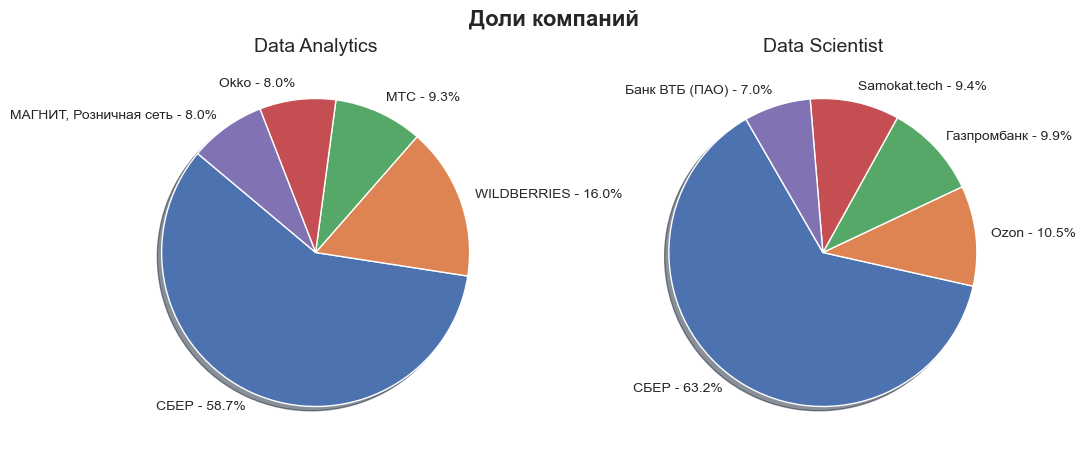

In [35]:
# получаем данные
df_da = vacancies[vacancies.name_type == 'da'].employer.value_counts()[:5]
         
df_ds = vacancies[vacancies.name_type == 'ds'].employer.value_counts()[:5]

print(f'Общее количество вакансий Data Analytics - {df_ds.sum()}')
print(f'Общее количество вакансий Data Scientist - {df_da.sum()}')

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da, 
      labels=[lbl + f' - {value / df_da.sum():.1%}' for lbl, value in df_da.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds, 
    labels=[lbl + f' - {value / df_ds.sum():.1%}' for lbl, value in df_ds.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли компаний', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

На современном рынке труда СБЕР занимает лидирующую позицию по количеству предлагаемых вакансий. Примечательно, что в таких организациях, как WILDBERRIES, ВТБ и МТС, существует повышенный спрос на аналитиков данных, в то время как в OZON, Газпромбанке и Samokat.tech более востребованы специалисты в области Data Science. Это указывает на разнообразие запросов рынка к специалистам по обработке данных, где каждая компания ищет профессионала, соответствующего её специфическим требованиям.

Общее количество вакансий Data Analytics - 223
Общее количество вакансий Data Scientist - 91


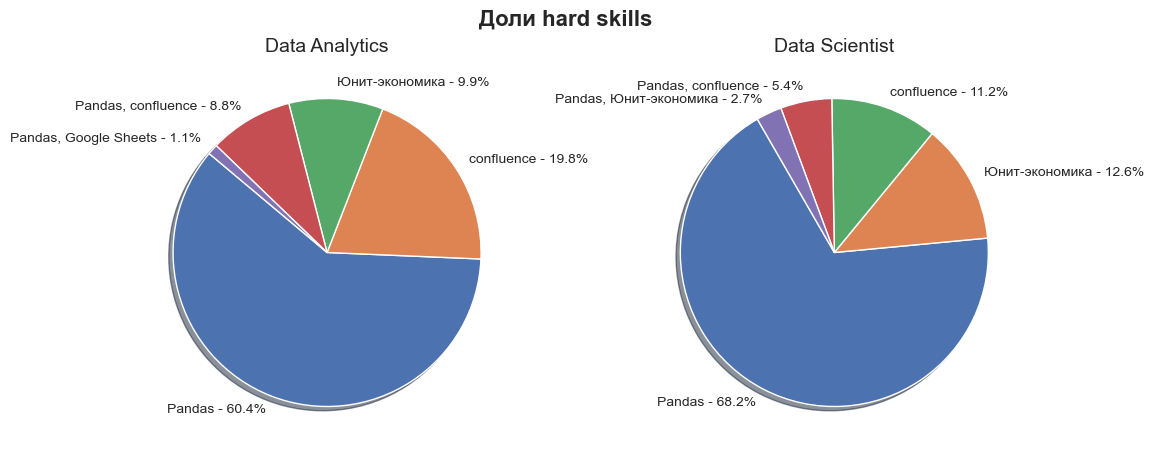

In [36]:
# получаем данные
df_da = vacancies[vacancies.name_type == 'da'].hard_skills_from_description.value_counts()[:5]
         
df_ds = vacancies[vacancies.name_type == 'ds'].hard_skills_from_description.value_counts()[:5]

print(f'Общее количество вакансий Data Analytics - {df_ds.sum()}')
print(f'Общее количество вакансий Data Scientist - {df_da.sum()}')

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da, 
      labels=[lbl + f' - {value / df_da.sum():.1%}' for lbl, value in df_da.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds, 
    labels=[lbl + f' - {value / df_ds.sum():.1%}' for lbl, value in df_ds.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли hard skills', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Как и следовало ожидать самый нужный навык - Pandas в обоих вариантах

Общее количество вакансий Data Analytics - 136
Общее количество вакансий Data Scientist - 55


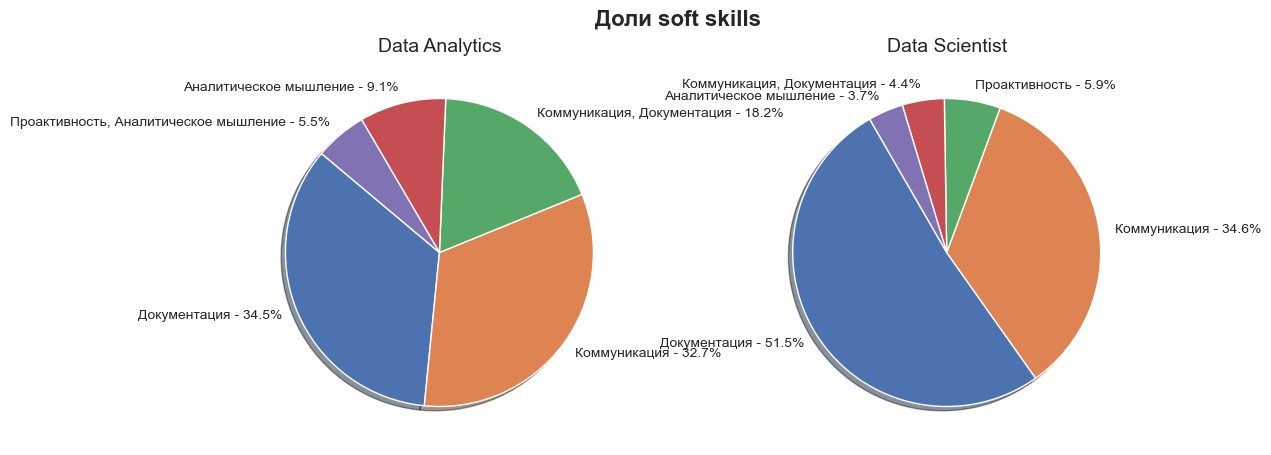

In [37]:
# получаем данные
df_da = vacancies[vacancies.name_type == 'da'].soft_skills_from_description.value_counts()[:5]
         
df_ds = vacancies[vacancies.name_type == 'ds'].soft_skills_from_description.value_counts()[:5]

print(f'Общее количество вакансий Data Analytics - {df_ds.sum()}')
print(f'Общее количество вакансий Data Scientist - {df_da.sum()}')

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da, 
      labels=[lbl + f' - {value / df_da.sum():.1%}' for lbl, value in df_da.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds, 
    labels=[lbl + f' - {value / df_ds.sum():.1%}' for lbl, value in df_ds.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли soft skills', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Документация и Коммуникация - важнейшие софт скиллы для всех аналитиков 

<font face='Liberation serif' size=5>
Выводы

- На рынке труда в сфере анализа данных наблюдается интересная закономерность: предложений работы для аналитиков в полтора раза больше, чем для дата-сайентистов. Это говорит о том, что у аналитиков шире возможности трудоустройства.
- Среди аналитиков наиболее востребованы специалисты уровня Junior+, а среди дата-сайентистов — специалисты среднего уровня (Middle) и Junior+. Это может указывать на разные требования к опыту работы в зависимости от специализации.
- СБЕР лидирует по количеству вакансий, что подчёркивает его значимость на рынке. Различия в запросах на аналитиков и дата-сайентистов в разных компаниях подтверждают, что каждый работодатель ищет специалистов, которые соответствуют уникальным требованиям и задачам.
- Документация и Коммуникация - важнейшие софт скиллы для всех аналитиков
- Самый нужный навык - Pandas в обоих вариантах

<font face='Liberation serif' size=6>
Типичное место работы Junior(no experiance)

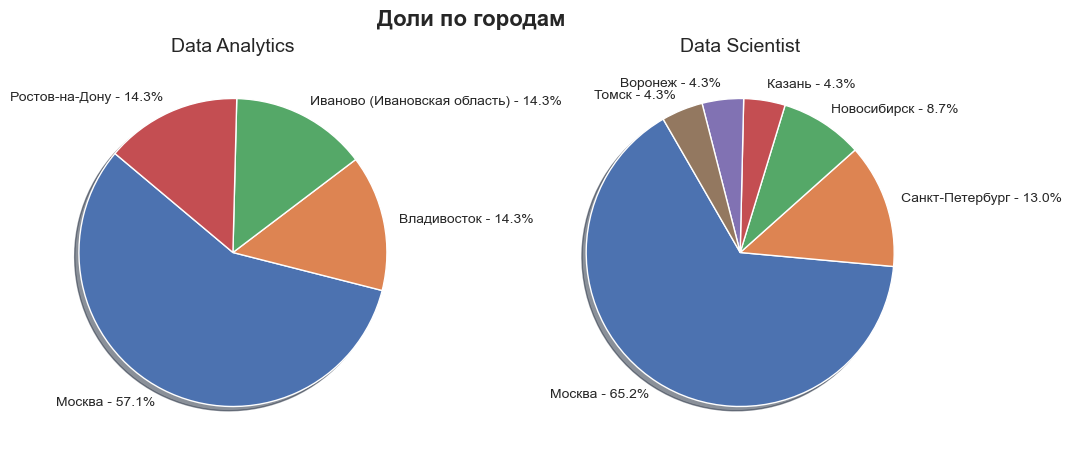

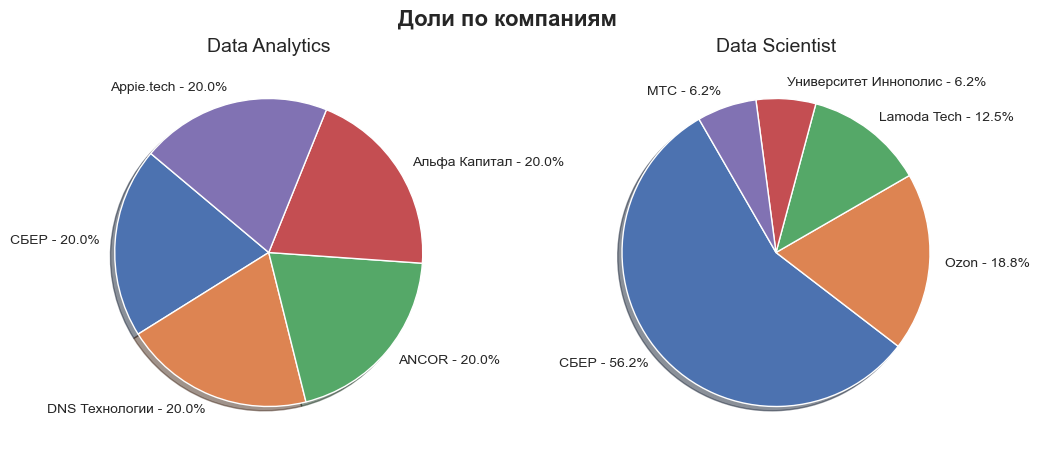

In [38]:
# получаем данные
jun =  vacancies[vacancies.experience == 'Junior (no experince)']

#Фильтруем данные по городу
df_da_area = jun[jun.name_type == 'da'].area.value_counts()
         
df_ds_area = jun[jun.name_type == 'ds'].area.value_counts()

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_area, 
      labels=[lbl + f' - {value / df_da_area.sum():.1%}' for lbl, value in df_da_area.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_area, 
    labels=[lbl + f' - {value / df_ds_area.sum():.1%}' for lbl, value in df_ds_area.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по городам', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Теперь рассмотрим компании
df_da_employer = jun[jun.name_type == 'da'].employer.value_counts()[:5]
         
df_ds_employer = jun[jun.name_type == 'ds'].employer.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employer, 
      labels=[lbl + f' - {value / df_da_employer.sum():.1%}' for lbl, value in df_da_employer.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employer, 
    labels=[lbl + f' - {value / df_ds_employer.sum():.1%}' for lbl, value in df_ds_employer.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по компаниям', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()



Москва открывает широкие возможности как для аналитиков данных, так и для дата-сайентистов. Именно здесь сосредоточено наибольшее количество вакансий в этой сфере. Это делает столицу идеальным местом для старта карьеры, особенно для тех, кто только начинает свой путь в области аналитики и науки о данных.
Сбер выделяется среди других компаний готовностью принимать на работу специалистов без опыта. Это отличная новость для начинающих аналитиков данных, которые только начинают свой профессиональный путь. Такая политика показывает, что компания ценит потенциал и желание развиваться больше, чем наличие формального опыта работы.
Для аналитиков данных без опыта ситуация ещё более благоприятна. Топ-5 компаний из нашего датасета демонстрируют одинаковую готовность принимать таких специалистов, что говорит о высоком спросе на квалифицированные кадры в этой области. Это открывает перед молодыми специалистами широкие перспективы для карьерного роста и развития в одной из самых востребованных профессий современности.

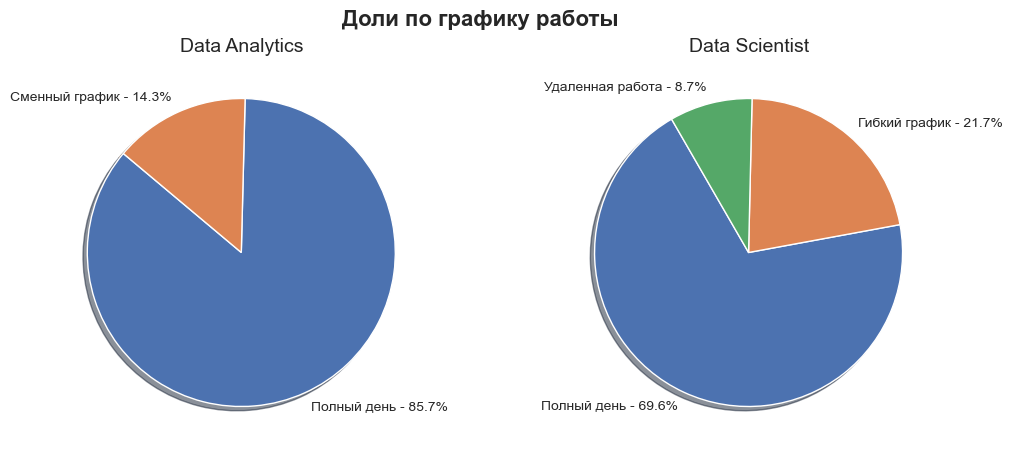

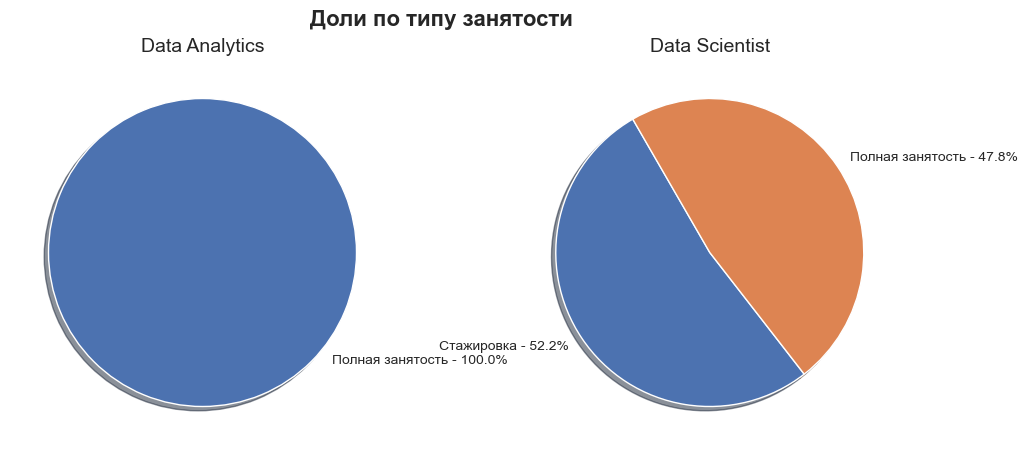

In [39]:
#Также рассмотрим график работы 
df_da_schedule = jun[jun.name_type == 'da'].schedule.value_counts()[:5]
         
df_ds_schedule = jun[jun.name_type == 'ds'].schedule.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_schedule, 
      labels=[lbl + f' - {value / df_da_schedule.sum():.1%}' for lbl, value in df_da_schedule.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_schedule, 
    labels=[lbl + f' - {value / df_ds_schedule.sum():.1%}' for lbl, value in df_ds_schedule.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по графику работы', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Тип Занятости
df_da_employment = jun[jun.name_type == 'da'].employment.value_counts()[:5]
         
df_ds_employment = jun[jun.name_type == 'ds'].employment.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employment, 
      labels=[lbl + f' - {value / df_da_employment.sum():.1%}' for lbl, value in df_da_employment.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employment, 
    labels=[lbl + f' - {value / df_ds_employment.sum():.1%}' for lbl, value in df_ds_employment.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по типу занятости', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


Для новичков в аналитической сфере предпочтительным вариантом является полная занятость, что позволяет погрузиться в рабочие процессы и быстрее адаптироваться к требованиям профессии. Однако, когда речь заходит о возможностях для профессионального роста и развития, дата-сайентисты имеют преимущество в виде большего количества предложений стажировок. Это открывает перед ними более широкий спектр возможностей для приобретения практического опыта и налаживания связей в индустрии.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_num', ylabel='Count'>

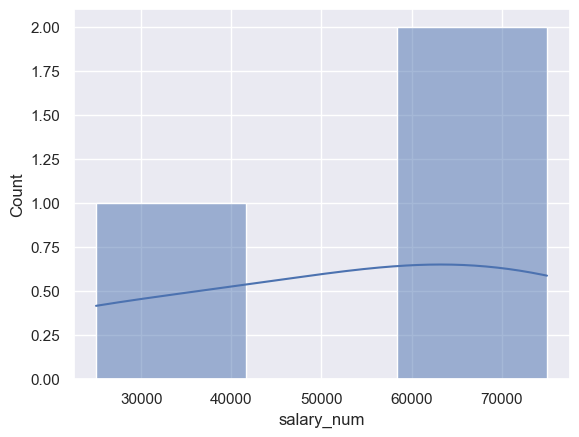

In [40]:
#По заработной плате 
sns.histplot(data=jun['salary_num'], kde=True)

Зарплата новичка в аналитике данных может варьироваться от 30 000  до 70 000 рублей, что является хорошей стартовой точкой для начала карьеры. 

<font face='Liberation serif' size=6>
Типичное место работы Junior(1-3 years)

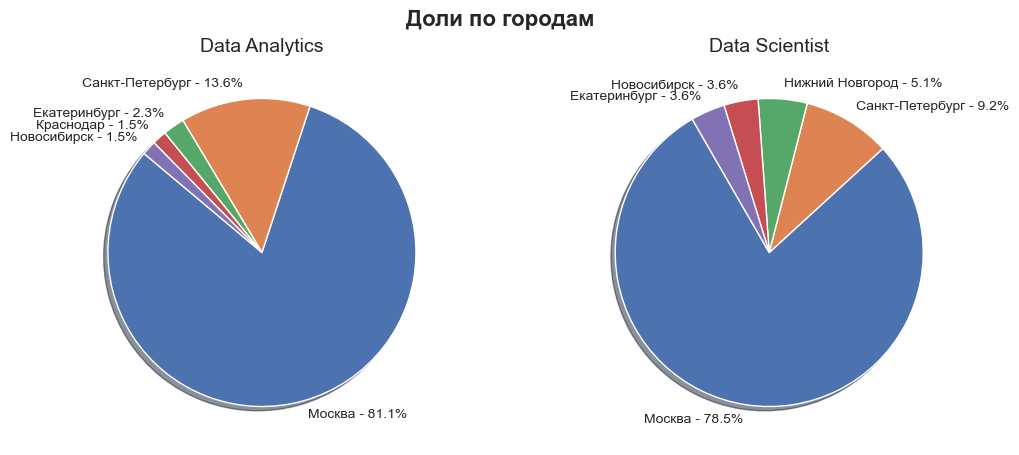

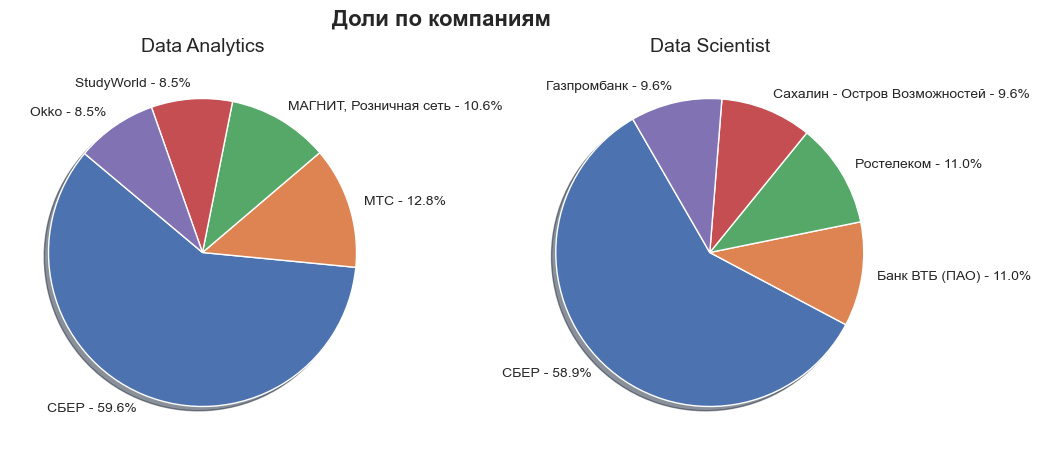

In [41]:
# получаем данные
jun_plus =  vacancies[vacancies.experience == 'Junior+ (1-3 years)']

#Фильтруем данные по городу
df_da_area_plus = jun_plus[jun_plus.name_type == 'da'].area.value_counts()[:5]
         
df_ds_area_plus = jun_plus[jun_plus.name_type == 'ds'].area.value_counts()[:5]

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_area_plus, 
      labels=[lbl + f' - {value / df_da_area_plus.sum():.1%}' for lbl, value in df_da_area_plus.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_area_plus, 
    labels=[lbl + f' - {value / df_ds_area_plus.sum():.1%}' for lbl, value in df_ds_area_plus.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по городам', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Теперь рассмотрим компании
df_da_employer_plus = jun_plus[jun_plus.name_type == 'da'].employer.value_counts()[:5]
         
df_ds_employer_plus = jun_plus[jun_plus.name_type == 'ds'].employer.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employer_plus, 
      labels=[lbl + f' - {value / df_da_employer_plus.sum():.1%}' for lbl, value in df_da_employer_plus.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employer_plus, 
    labels=[lbl + f' - {value / df_ds_employer_plus.sum():.1%}' for lbl, value in df_ds_employer_plus.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по компаниям', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()



Москва предоставляет обширные возможности для специалистов в области аналитики данных и data science. Здесь сосредоточено наибольшее количество предложений работы в этой сфере, что делает столицу идеальным местом для начала карьеры, особенно для тех, кто только начинает свой путь в анализе данных и науке о данных. Сбер выделяется среди других компаний тем, что готов нанимать сотрудников с небольшим опытом работы. Это отличная новость для начинающих специалистов в области аналитики данных, которые уже имеют 1–3 года опыта работы и продолжают свой профессиональный путь.


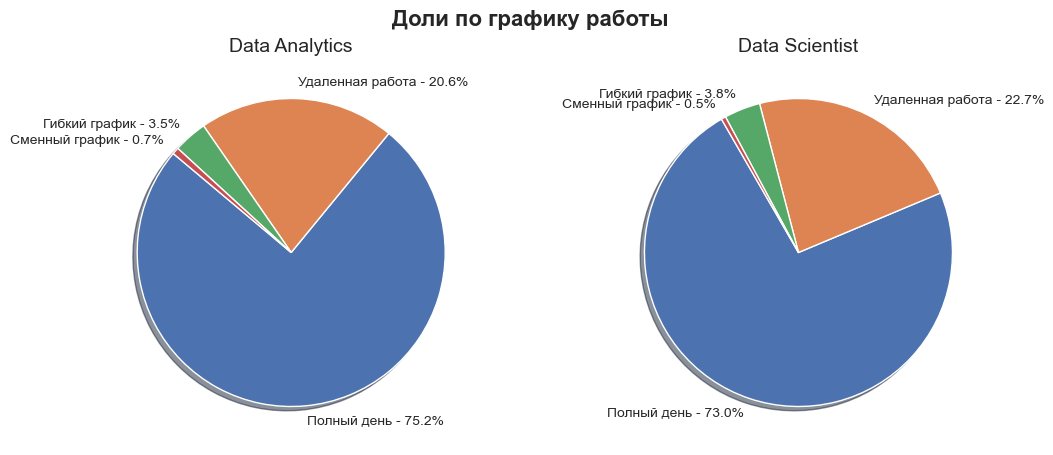

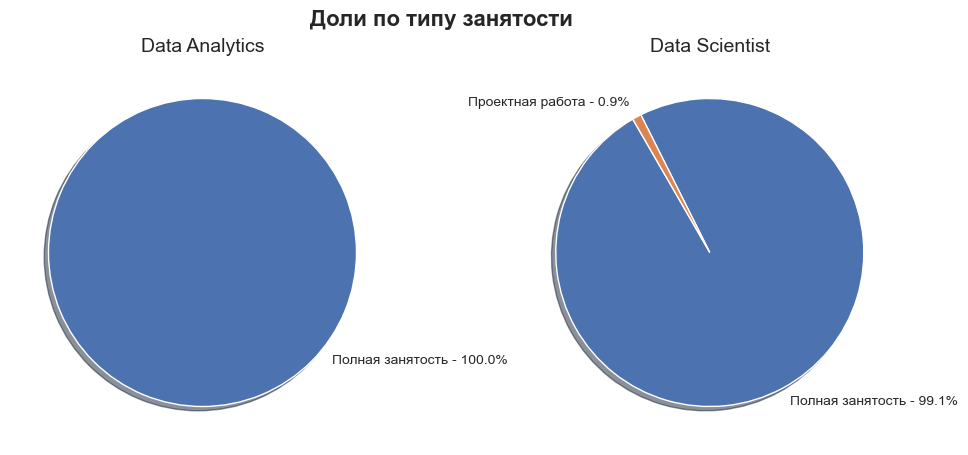

In [42]:
#Также рассмотрим график работы 
df_da_schedule_plus = jun_plus[jun_plus.name_type == 'da'].schedule.value_counts()[:5]
         
df_ds_schedule_plus = jun_plus[jun_plus.name_type == 'ds'].schedule.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_schedule_plus, 
      labels=[lbl + f' - {value / df_da_schedule_plus.sum():.1%}' for lbl, value in df_da_schedule_plus.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_schedule_plus, 
    labels=[lbl + f' - {value / df_ds_schedule_plus.sum():.1%}' for lbl, value in df_ds_schedule_plus.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по графику работы', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Тип Занятости
df_da_employment_plus = jun_plus[jun_plus.name_type == 'da'].employment.value_counts()[:5]
         
df_ds_employment_plus = jun_plus[jun_plus.name_type == 'ds'].employment.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employment_plus, 
      labels=[lbl + f' - {value / df_da_employment_plus.sum():.1%}' for lbl, value in df_da_employment_plus.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employment_plus, 
    labels=[lbl + f' - {value / df_ds_employment_plus.sum():.1%}' for lbl, value in df_ds_employment_plus.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по типу занятости', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Здесь без исключений лидирует Полная занятость и полный рабочий день.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_num', ylabel='Count'>

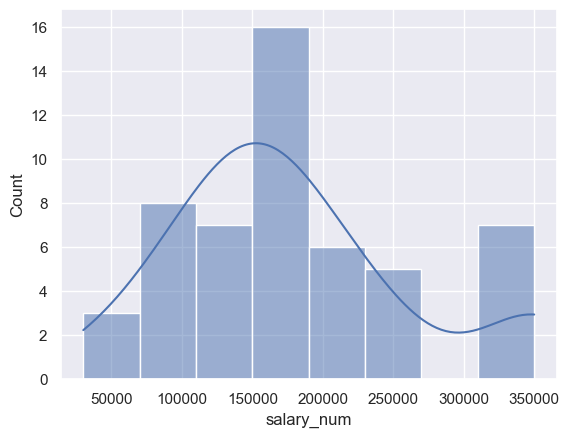

In [43]:
#По заработной плате 
sns.histplot(data=jun_plus['salary_num'], kde=True)

Заработная плата варьируется от 50 000 до 350 000 руб. Большинство компаний готовы предложить от 150 до 190 тыс.руб

<font face='Liberation serif' size=6>
Типичное место работы Middle(3-6 years)

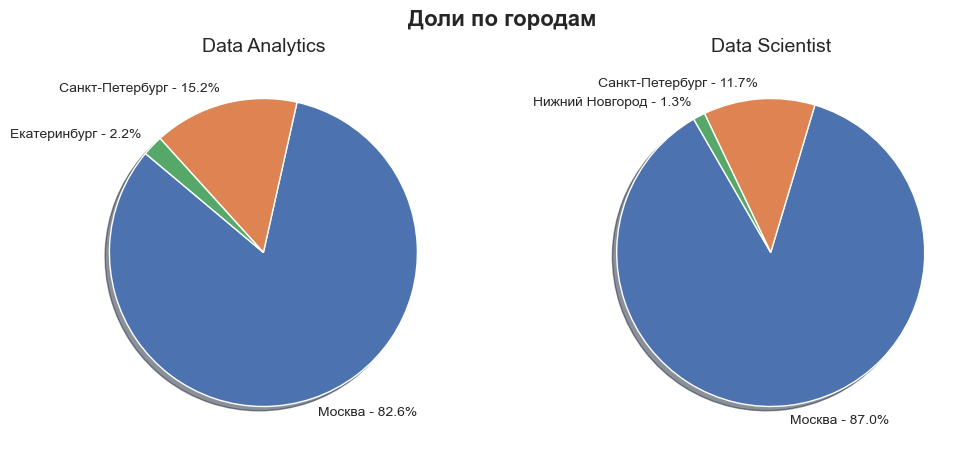

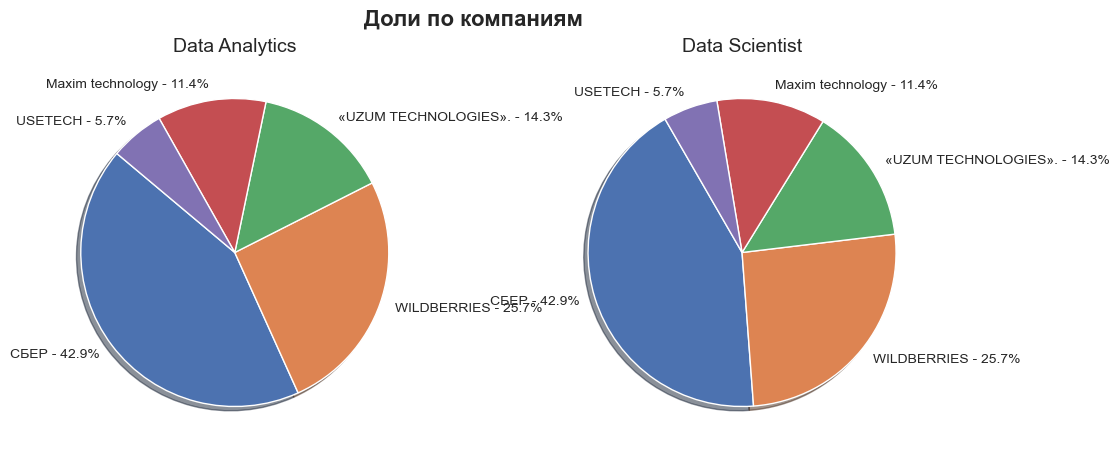

In [44]:
# получаем данные
middle =  vacancies[vacancies.experience == 'Middle (3-6 years)']

#Фильтруем данные по городу
df_da_area_middle = middle[middle.name_type == 'da'].area.value_counts()[:3]
         
df_ds_area_middle = middle[middle.name_type == 'ds'].area.value_counts()[:3]

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_area_middle, 
      labels=[lbl + f' - {value / df_da_area_middle.sum():.1%}' for lbl, value in df_da_area_middle.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_area_middle, 
    labels=[lbl + f' - {value / df_ds_area_middle.sum():.1%}' for lbl, value in df_ds_area_middle.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по городам', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Теперь рассмотрим компании
df_da_employer_middle = middle[middle.name_type == 'da'].employer.value_counts()[:5]
         
df_ds_employer_middle = middle[middle.name_type == 'ds'].employer.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employer_middle, 
      labels=[lbl + f' - {value / df_da_employer_middle.sum():.1%}' for lbl, value in df_da_employer_middle.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_da_employer_middle, 
    labels=[lbl + f' - {value / df_da_employer_middle.sum():.1%}' for lbl, value in df_da_employer_middle.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по компаниям', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()



Для специалистов, которые уже давно работают в сфере аналитики, Москва остаётся прекрасным местом для поиска работы. СБЕР продолжает занимать лидирующие позиции.

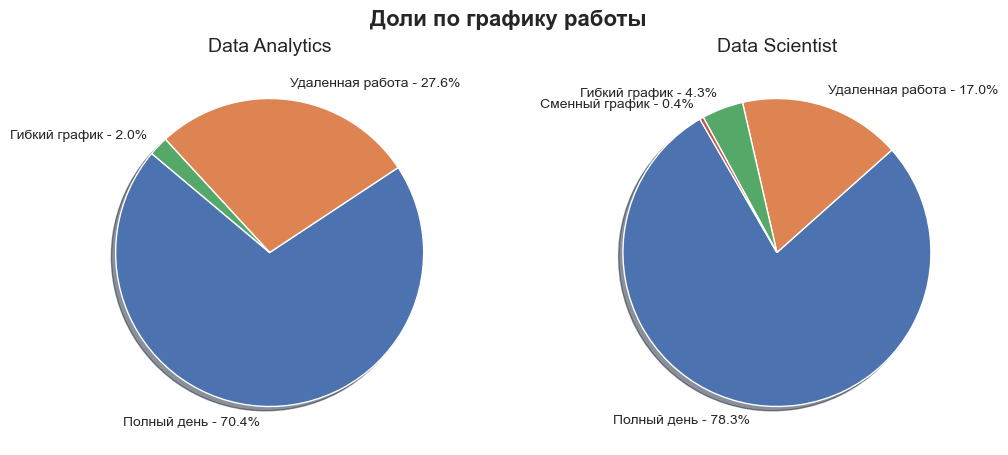

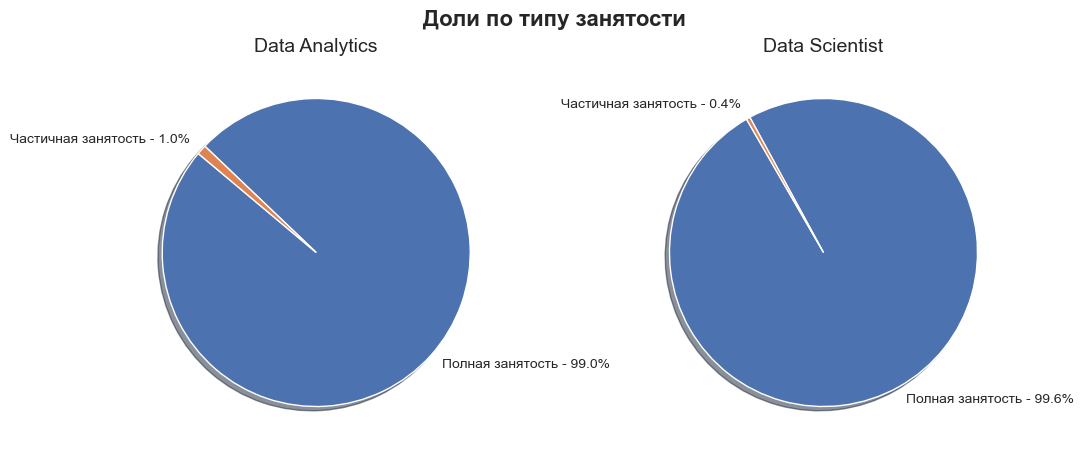

In [45]:
#Также рассмотрим график работы 
df_da_schedule_middle = middle[middle.name_type == 'da'].schedule.value_counts()[:5]
         
df_ds_schedule_middle = middle[middle.name_type == 'ds'].schedule.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_schedule_middle, 
      labels=[lbl + f' - {value / df_da_schedule_middle.sum():.1%}' for lbl, value in df_da_schedule_middle.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_schedule_middle, 
    labels=[lbl + f' - {value / df_ds_schedule_middle.sum():.1%}' for lbl, value in df_ds_schedule_middle.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по графику работы', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Тип Занятости
df_da_employment_middle = middle[middle.name_type == 'da'].employment.value_counts()[:5]
         
df_ds_employment_middle = middle[middle.name_type == 'ds'].employment.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employment_middle, 
      labels=[lbl + f' - {value / df_da_employment_middle.sum():.1%}' for lbl, value in df_da_employment_middle.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employment_middle, 
    labels=[lbl + f' - {value / df_ds_employment_middle.sum():.1%}' for lbl, value in df_ds_employment_middle.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по типу занятости', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Опытные сотрудники по-прежнему могут рассчитывать на полную занятость и полный рабочий день.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_num', ylabel='Count'>

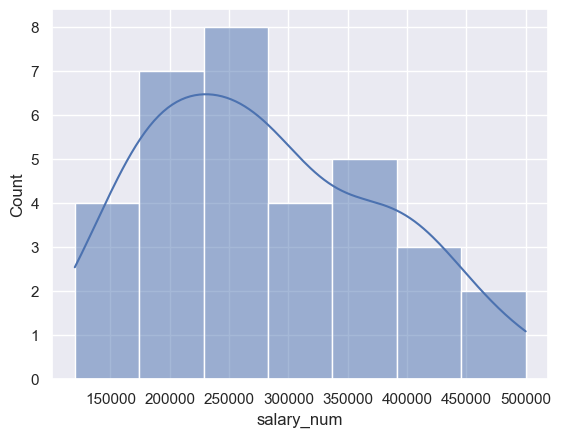

In [46]:
#По заработной плате 
sns.histplot(data=middle['salary_num'], kde=True)

Заработная плата миддл специалиста варьируется от 150 000 до 500 000 руб. Большинство компаний готовы предложить от 200 до 250 тыс.руб

<font face='Liberation serif' size=6>
Типичное место работы Senior (6+ years)

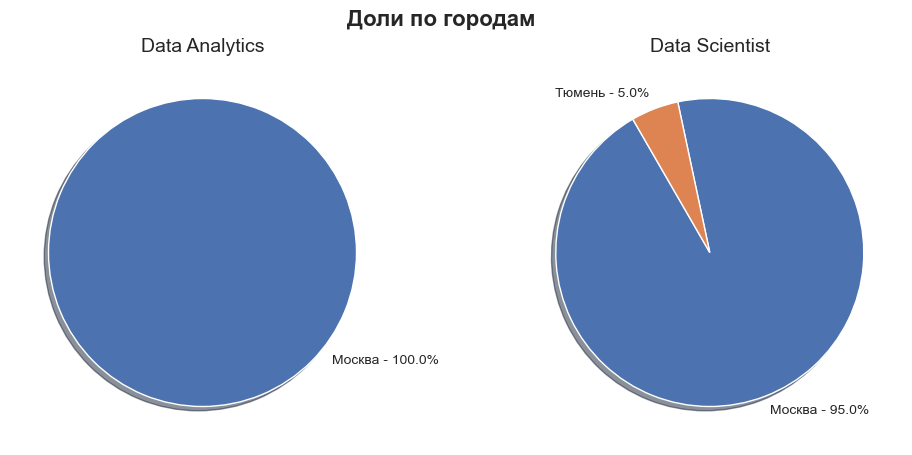

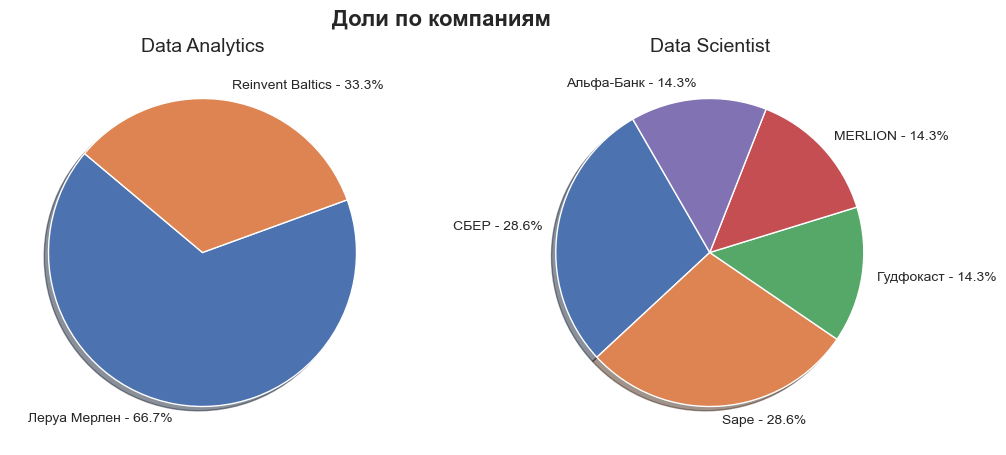

In [47]:
# получаем данные
senior =  vacancies[vacancies.experience == 'Senior (6+ years)']

#Фильтруем данные по городу
df_da_area_senior = senior[senior.name_type == 'da'].area.value_counts()[:3]
         
df_ds_area_senior = senior[senior.name_type == 'ds'].area.value_counts()[:3]

# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_area_senior, 
      labels=[lbl + f' - {value / df_da_area_senior.sum():.1%}' for lbl, value in df_da_area_senior.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_area_senior, 
    labels=[lbl + f' - {value / df_ds_area_senior.sum():.1%}' for lbl, value in df_ds_area_senior.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по городам', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Теперь рассмотрим компании
df_da_employer_senior = senior[senior.name_type == 'da'].employer.value_counts()[:5]
         
df_ds_employer_senior = senior[senior.name_type == 'ds'].employer.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employer_senior, 
      labels=[lbl + f' - {value / df_da_employer_senior.sum():.1%}' for lbl, value in df_da_employer_senior.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employer_senior, 
    labels=[lbl + f' - {value / df_ds_employer_senior.sum():.1%}' for lbl, value in df_ds_employer_senior.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по компаниям', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Москва по-прежнему остаётся лучшим местом с точки зрения количества доступных вакансий. Среди компаний в этот раз первое место занимает не СБЕР, а Леруа Мерлен.

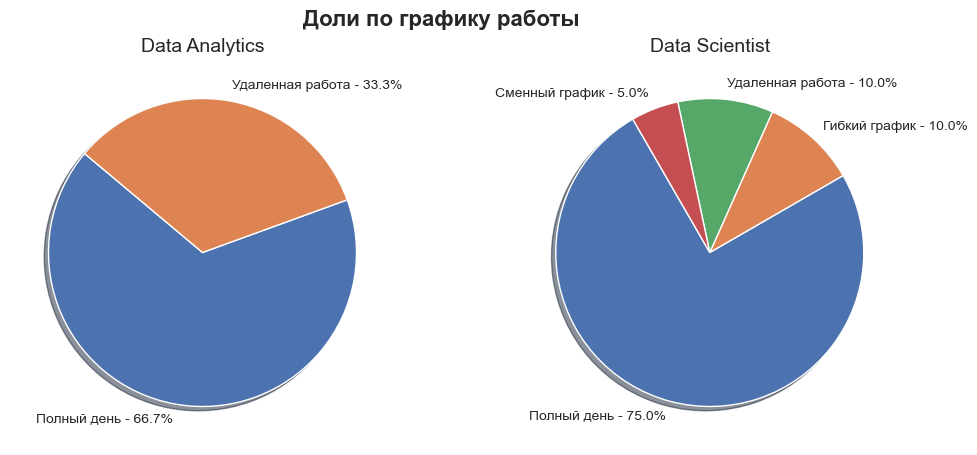

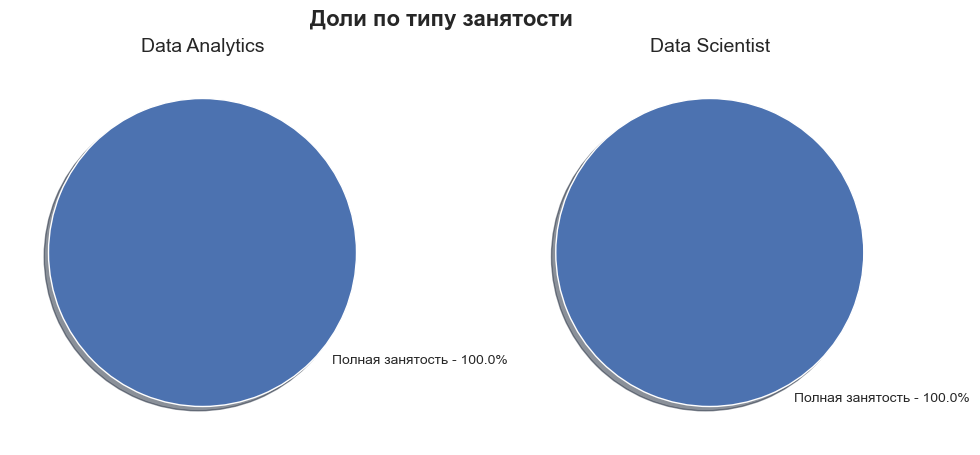

In [48]:
#Также рассмотрим график работы 
df_da_schedule_senior = senior[senior.name_type == 'da'].schedule.value_counts()[:5]
         
df_ds_schedule_senior = senior[senior.name_type == 'ds'].schedule.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_schedule_senior, 
      labels=[lbl + f' - {value / df_da_schedule_senior.sum():.1%}' for lbl, value in df_da_schedule_senior.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_schedule_senior, 
    labels=[lbl + f' - {value / df_ds_schedule_senior.sum():.1%}' for lbl, value in df_ds_schedule_senior.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по графику работы', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()


# Тип Занятости
df_da_employment_senior = senior[senior.name_type == 'da'].employment.value_counts()[:5]
         
df_ds_employment_senior = senior[senior.name_type == 'ds'].employment.value_counts()[:5]


# Создаем фигуру
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da_employment_senior, 
      labels=[lbl + f' - {value / df_da_employment_senior.sum():.1%}' for lbl, value in df_da_employment_senior.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Data Analytics', fontsize=14)

# Круговая диаграмма для датасаентистов
axes[1].pie(
    df_ds_employment_senior, 
    labels=[lbl + f' - {value / df_ds_employment_senior.sum():.1%}' for lbl, value in df_ds_employment_senior.items()], 
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Data Scientist', fontsize=14)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли по типу занятости', fontsize=16, fontweight='bold')

# Отображаем график
plt.show()

Как правило, синьор либо руководит другими сотрудниками, либо обучает их. Именно поэтому он может претендовать на полную занятость и полный рабочий день. Но в некоторых случаях аналитик данных со званием сеньор может претендовать на удаленную работу 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_num', ylabel='Count'>

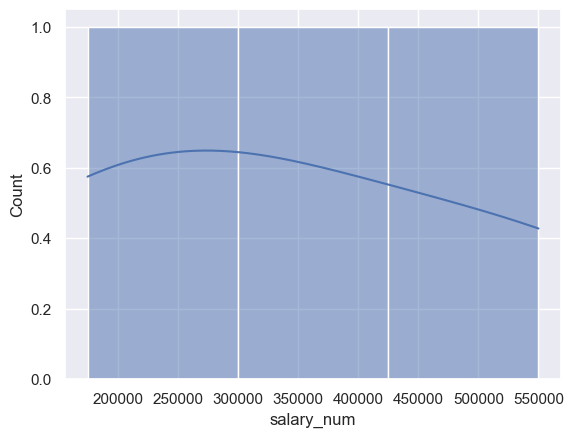

In [49]:
#По заработной плате 
sns.histplot(data=senior['salary_num'], kde=True)

Заработная плата сеньор специалиста варьируется от 200 000 до 550 000 руб. Большинство компаний готовы предлагать и обсуждать зарплату в этом диапазоне

По некоторым грейдам вакансий мало. Стоит взглянуть на медиану

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

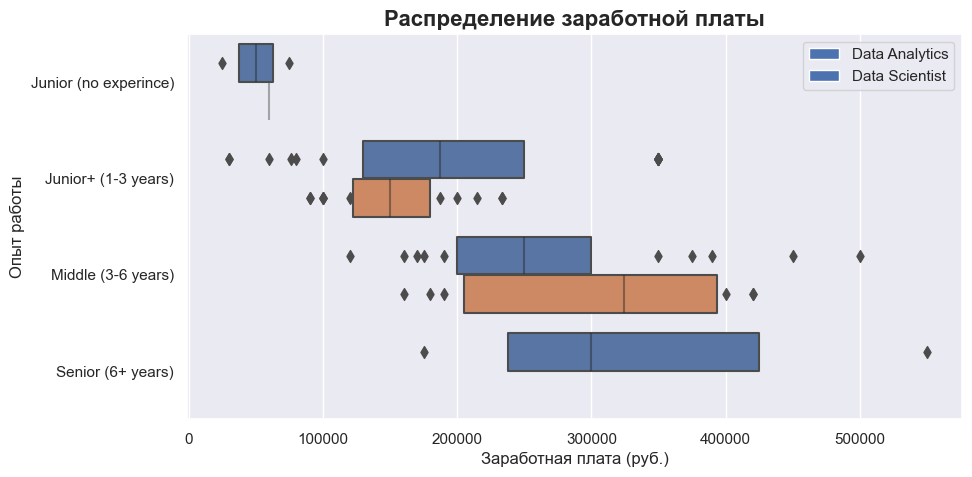

In [50]:
order = vacancies.groupby(['name_type', 'experience']).agg({'salary_num': 'median'}).reset_index().iloc[:4]['experience']
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxenplot(data=vacancies, x='salary_num', y='experience', hue='name_type', order=order, ax=ax)
ax.set_title('Распределение заработной платы', fontsize=16, fontweight='bold')
ax.set_ylabel('Опыт работы')
ax.set_xlabel('Заработная плата (руб.)')


analyst_patch = mpatches.Patch(label='Data Analytics')
datascience_patch = mpatches.Patch(label='Data Scientist')

plt.legend(handles=[analyst_patch, datascience_patch], loc='upper right')

plt.show()

Информация о зарплатах начинающих специалистов без опыта и экспертов с высокой квалификацией неполная, поэтому сложно точно определить их доходы. Но можно сказать, что аналитики уровней junior+ и middle зарабатывают меньше, чем их коллеги-датасаентисты с таким же опытом работы. Например, медианная зарплата аналитика на уровне junior+ составляет примерно 100 тысяч рублей, а у датасаентиста этой же категории — более 200 тысяч рублей. У специалистов middle уровня разница тоже значительная: медианная зарплата аналитика не доходит до 200 тысяч рублей, а у датасаентиста превышает 250 тысяч рублей.

<font face='Liberation serif' size=5>
Выводы

- Москва предлагает широкие возможности для специалистов в области аналитики данных и data science, являясь идеальным местом для старта карьеры, особенно для начинающих специалистов. Сбер выделяется готовностью нанимать сотрудников без опыта, что открывает перспективы для молодых специалистов.
- Для новичков предпочтительна полная занятость, позволяющая быстрее адаптироваться к требованиям профессии. Дата-сайентисты имеют преимущество в виде большего количества предложений стажировок, что способствует профессиональному росту и развитию.
- Зарплаты начинающих специалистов варьируются от 30 000 до 70 000 рублей, что является хорошей стартовой точкой. Опытные специалисты могут рассчитывать на заработную плату от 150 000 до 500 000 рублей.
- Москва остается привлекательным местом для опытных специалистов, предлагая им полную занятость и высокий уровень дохода.

<font face='Liberation serif' size=6>
Итоговый Вывод

Исследование рынка труда в области аналитики данных и Data Science показало, что аналитики данных более востребованы, чем датасаентисты, особенно специалисты уровня Junior+. Основные работодатели в этой сфере — Сбербанк, Магнит, ВТБ, OZON и Wildberries.
Большинство вакансий предлагают полную занятость, но для начинающих специалистов есть стажировки и проектная работа. С увеличением опыта у аналитиков растёт доля предложений с возможностью удалённой работы, в то время как у датасаентистов — наоборот.
Начинающие аналитики часто получают зарплату ниже 100 тысяч рублей, в то время как доходы датасаентистов на уровне Junior+ и Middle выше.
Таким образом, рынок труда в сфере аналитики данных и Data Science динамичен и разнообразен, но требует от соискателей гибкости, а от компаний — чёткого понимания своих потребностей и умения привлекать нужные кадры.